<a href="https://colab.research.google.com/github/markavin/ML_Pemula/blob/main/DalamNamaTUhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif, mutual_info_regression
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
superstore = "/content/salah.csv"
df = pd.read_csv(superstore, encoding="latin1")
print("Dataset berhasil dimuat")

df.head()

Dataset berhasil dimuat


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
print(f"Dimensi dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nInformasi dataset:")
df.info()
print("\nTipe data setiap kolom:")
print(df.dtypes)
print("\nDeskripsi statistik data numerik:\n", df.describe())
print("\nInformasi kolom kategorikal:\n", df.describe(include=['O']))

Dimensi dataset: (9994, 21)
Jumlah baris: 9994
Jumlah kolom: 21

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name

In [ ]:
# Memeriksa nilai yang hilang
print("\nNilai yang hilang per kolom:")
print(df.isnull().sum())


# Memeriksa duplikasi data
print("\nJumlah duplikasi:", df.duplicated().sum())


Nilai yang hilang per kolom:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Jumlah duplikasi: 0


In [ ]:
# 3.3. Analisis Distribusi dan Korelasi (Fokus pada kolom yang relevan)
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit'] # Kolom numerik yang relevan
categorical_cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']

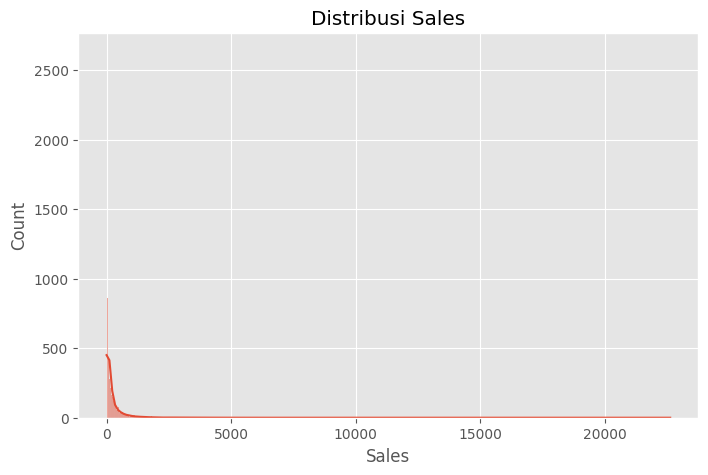

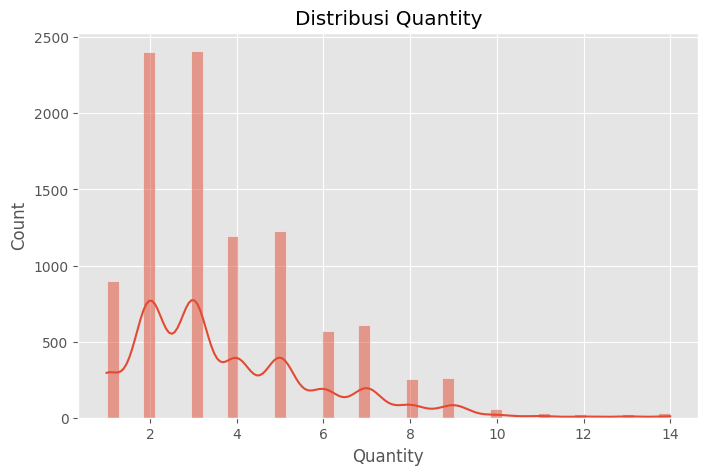

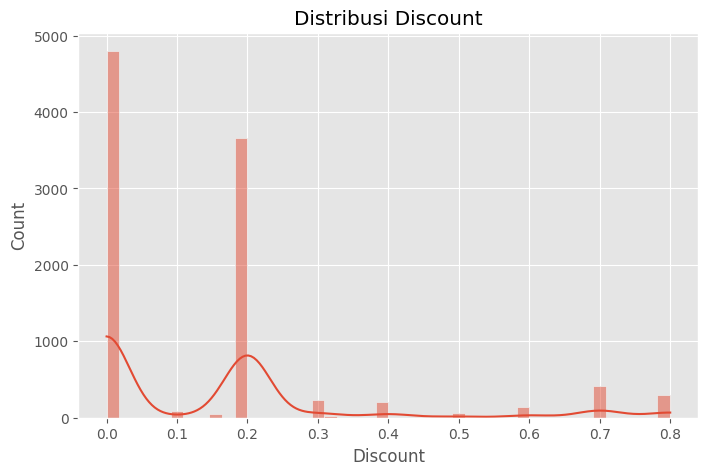

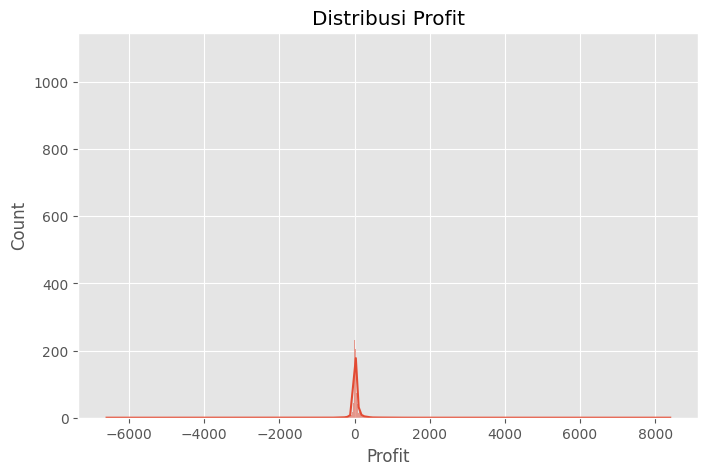

In [ ]:
# Distribusi variabel numerik
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()


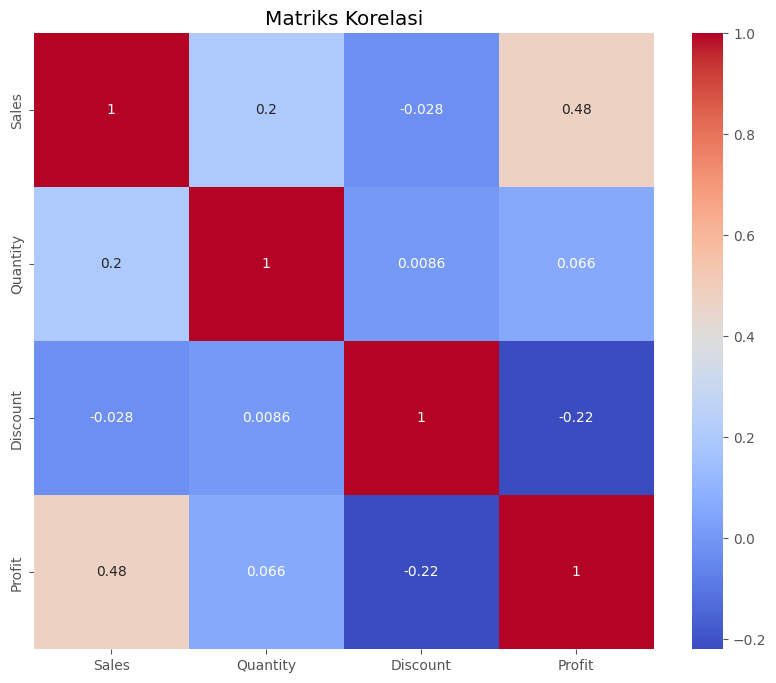

In [ ]:
# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

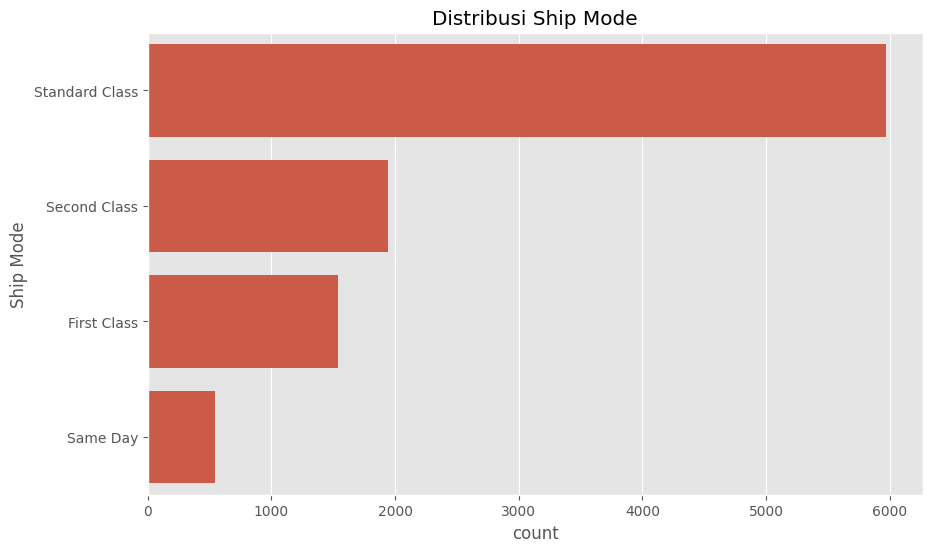

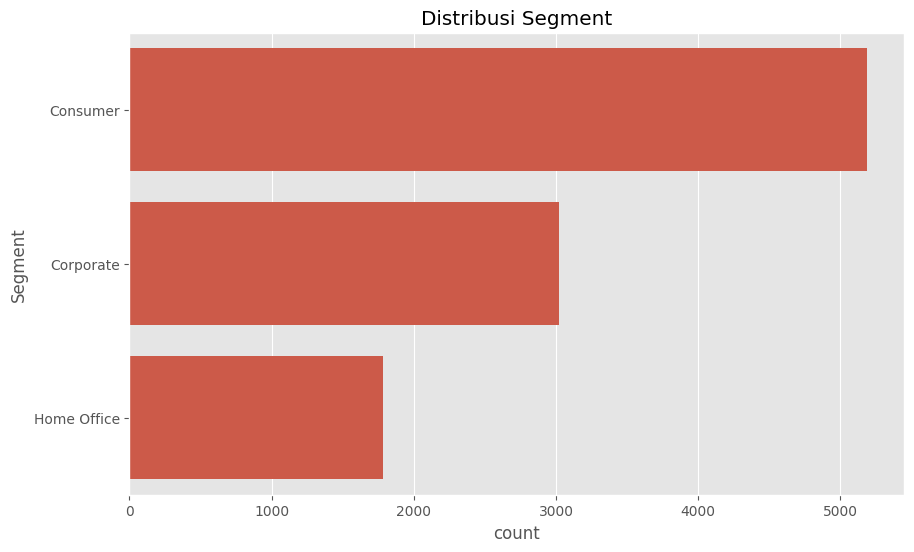

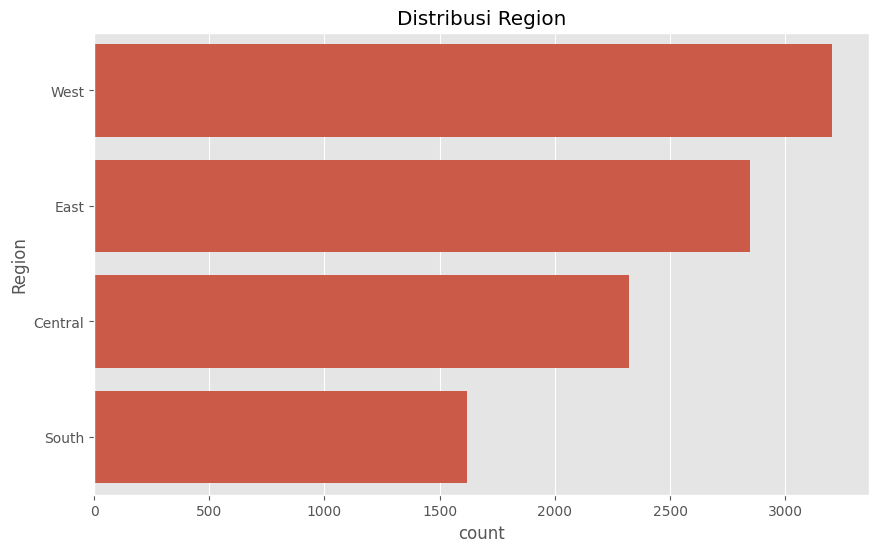

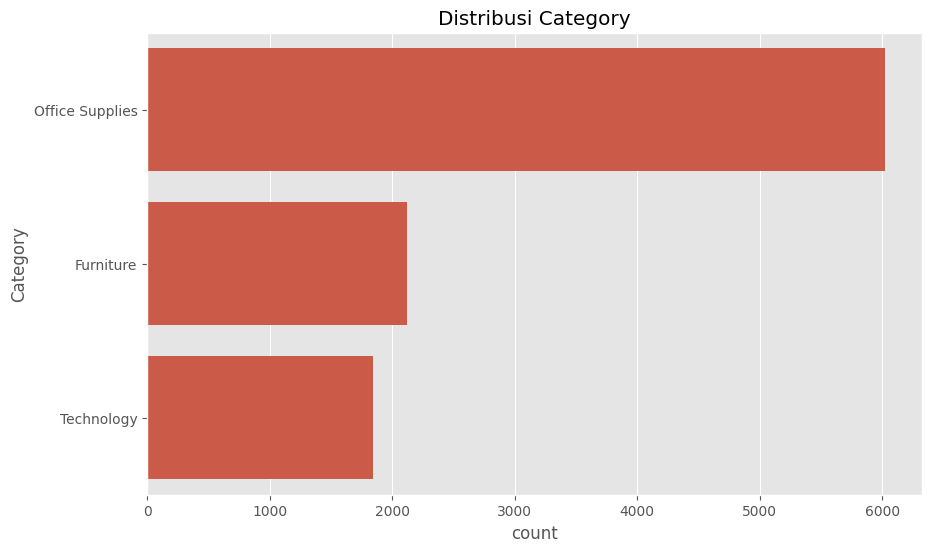

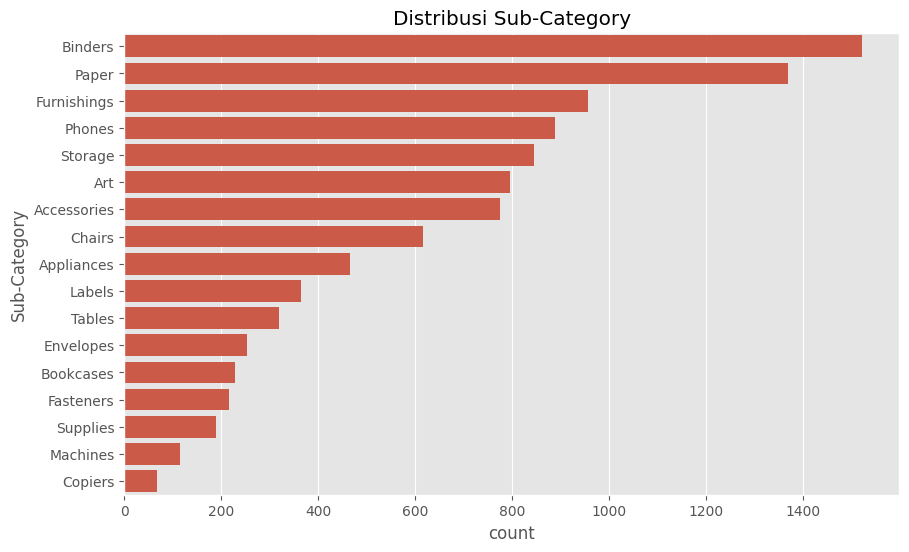

In [ ]:
# 3.4. Visualisasi Data Kategorikal
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# 4.1. Menghapus Kolom yang Tidak Relevan
# Kolom-kolom seperti 'Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', dan 'Product Name'
# mungkin tidak relevan untuk clustering dan klasifikasi.
# 4.1. Menghapus Kolom yang Tidak Relevan
df = df.drop(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID', 'Product Name'], axis=1)

In [ ]:
# 4.2. Menghapus Data Duplikat
df = df.drop_duplicates()


In [ ]:
# 4.4. Encoding Data Kategorikal
# Menggunakan OneHotEncoder untuk kolom kategorikal
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

In [ ]:
# Menggunakan ColumnTransformer untuk transformasi
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_cols), # Menambahkan sparse_output=False
    ('scaler', StandardScaler(), numerical_cols)
], remainder='drop')

df_transformed = transformer.fit_transform(df)

In [ ]:
categorical_encoded_cols = list(transformer.named_transformers_['onehot'].get_feature_names_out(categorical_cols))
all_cols = categorical_encoded_cols + numerical_cols

In [ ]:
# Periksa dimensi df_transformed
print("Dimensi df_transformed:", df_transformed.shape)
print("Jumlah kolom yang diharapkan:", len(all_cols))

Dimensi df_transformed: (9944, 608)
Jumlah kolom yang diharapkan: 608


In [ ]:
# Periksa apakah jumlah kolom sesuai
if df_transformed.shape[1] == len(all_cols):
    df_transformed = pd.DataFrame(df_transformed, columns=all_cols)
    print("DataFrame berhasil dibuat.")
else:
    print("Error: Jumlah kolom tidak sesuai.")

DataFrame berhasil dibuat.


In [ ]:
# 4.3. Menangani Outlier (Opsional) - Setelah Transformasi
if 'df_transformed' in locals(): # Memastikan df_transformed telah dibuat
    numerical_scaled_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
    Q1 = df_transformed[numerical_scaled_cols].quantile(0.25)
    Q3 = df_transformed[numerical_scaled_cols].quantile(0.75)
    IQR = Q3 - Q1
    df_transformed = df_transformed[~((df_transformed[numerical_scaled_cols] < (Q1 - 1.5 * IQR)) | (df_transformed[numerical_scaled_cols] > (Q3 + 1.5 * IQR)).any(axis=1))]
    print("Outlier berhasil ditangani.")
else:
    print("DataFrame df_transformed tidak dibuat, penanganan outlier dilewati.")

Outlier berhasil ditangani.


In [ ]:
# Menangani NaN sebelum melatih KMeans
df_transformed = df_transformed.fillna(0)

In [ ]:
print(df_transformed.head())

   Ship Mode_Same Day  Ship Mode_Second Class  Ship Mode_Standard Class  \
0                 0.0                     0.0                       0.0   
1                 0.0                     0.0                       0.0   
2                 0.0                     0.0                       0.0   
3                 0.0                     0.0                       0.0   
4                 0.0                     0.0                       0.0   

   Segment_Corporate  Segment_Home Office  City_Abilene  City_Akron  \
0                0.0                  0.0           0.0         0.0   
1                0.0                  0.0           0.0         0.0   
2                0.0                  0.0           0.0         0.0   
3                0.0                  0.0           0.0         0.0   
4                0.0                  0.0           0.0         0.0   

   City_Albuquerque  City_Alexandria  City_Allen  City_Allentown  \
0               0.0              0.0         0.0      

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# 1. Pilih algoritma clustering yang sesuai
kmeans = KMeans(n_clusters=3, random_state=42) # Contoh: K-Means dengan 3 cluster
# 2. Latih model dengan data menggunakan algoritma tersebut
kmeans.fit(df_transformed)

KMeans(n_clusters=3, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# 1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df_transformed)
    silhouette_avg = silhouette_score(df_transformed, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score untuk {n_clusters} cluster: {silhouette_avg}")

Silhouette Score untuk 2 cluster: 0.7646038931640803
Silhouette Score untuk 3 cluster: 0.4761299779708261
Silhouette Score untuk 4 cluster: 0.472794125444084
Silhouette Score untuk 5 cluster: 0.4454575849660904
Silhouette Score untuk 6 cluster: 0.4146063662027295
Silhouette Score untuk 7 cluster: 0.40219126784146464
Silhouette Score untuk 8 cluster: 0.41166577990728137
Silhouette Score untuk 9 cluster: 0.4133503619258768
Silhouette Score untuk 10 cluster: 0.4166788226077908


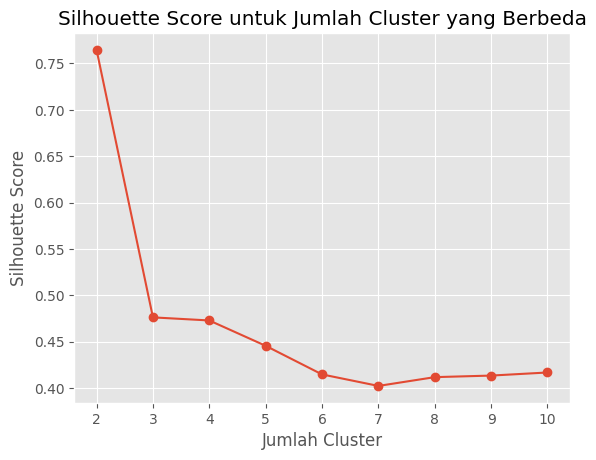

In [ ]:
# Visualisasi Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Jumlah Cluster yang Berbeda')
plt.show()

In [ ]:
# Elbow Method (Opsional)
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_transformed)
    inertia.append(kmeans.inertia_)

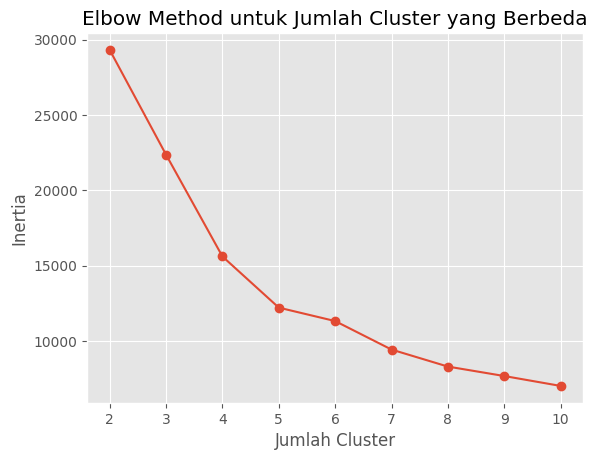

In [ ]:
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Jumlah Cluster yang Berbeda')
plt.show()

In [ ]:
# Pilih jumlah cluster optimal berdasarkan Silhouette Score atau Elbow Method
optimal_clusters = 2 # Contoh: 3 cluster berdasarkan Silhouette Score
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(df_transformed)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# 1. Hitung Silhouette Score sebelum feature selection
silhouette_avg_before = silhouette_score(df_transformed, labels)
print(f"Silhouette Score sebelum feature selection: {silhouette_avg_before}")

Silhouette Score sebelum feature selection: 0.7646038931640803


In [ ]:
# 2. Lakukan feature selection
selector = SelectKBest(f_classif, k=200)
df_selected = selector.fit_transform(df_transformed, labels)

# 3. Hitung Silhouette Score setelah feature selection
silhouette_avg_after = silhouette_score(df_selected, labels)
print(f"Silhouette Score setelah feature selection: {silhouette_avg_after}")

Silhouette Score setelah feature selection: 0.7646038931640907


In [ ]:
# 6. Bandingkan dan tentukan yang terbaik
if silhouette_avg_after > silhouette_avg_before:
    print("Feature selection meningkatkan Silhouette Score (2 cluster).")
    print("Hasil setelah feature selection lebih baik.")
elif silhouette_avg_after < silhouette_avg_before:
    print("Feature selection menurunkan Silhouette Score (2 cluster).")
    print("Hasil sebelum feature selection lebih baik.")
else:
    print("Feature selection tidak mengubah Silhouette Score (2 cluster).")
    print("Keduanya sama baik.")

Feature selection meningkatkan Silhouette Score (2 cluster).
Hasil setelah feature selection lebih baik.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_transformed)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

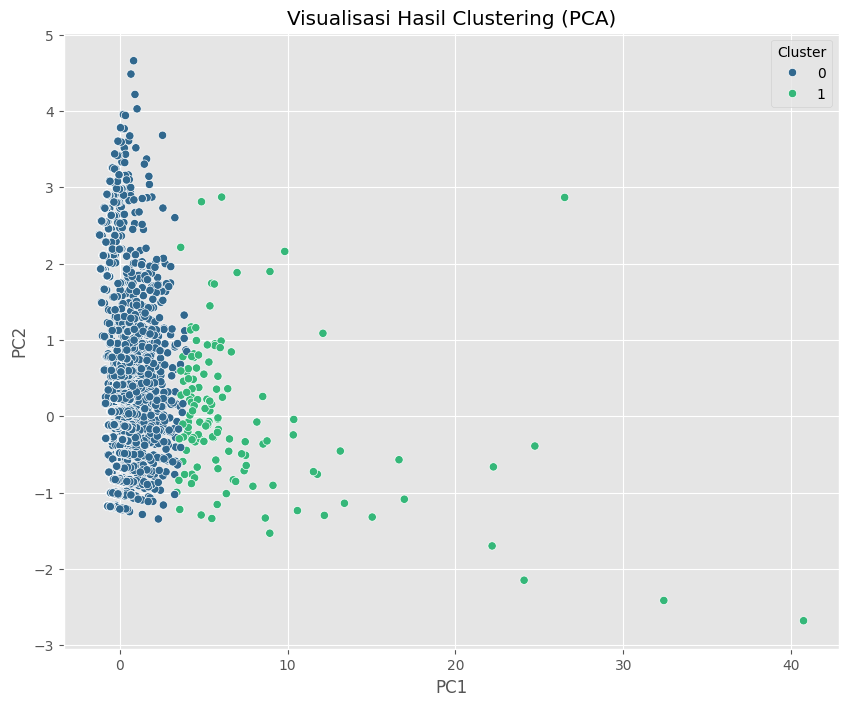

In [ ]:
# Visualisasi scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Visualisasi Hasil Clustering (PCA)')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df['Cluster'] = labels

In [ ]:
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
numerical_transformed = transformer.named_transformers_['scaler'].inverse_transform(df_transformed[numerical_cols])
df[numerical_cols] = numerical_transformed


In [ ]:
# 3. Inverse transform untuk kolom kategorikal (one-hot encoding)
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
categorical_encoded_cols = list(transformer.named_transformers_['onehot'].get_feature_names_out(categorical_cols))

In [ ]:
# Buat DataFrame dari hasil one-hot encoding
df_onehot = pd.DataFrame(transformer.named_transformers_['onehot'].inverse_transform(df_transformed[categorical_encoded_cols]), columns=categorical_cols)

In [ ]:
df = pd.concat([df, df_onehot], axis=1)

In [ ]:
print(df['Cluster'].isnull().sum())

49


In [ ]:
# Tangani nilai NaN (isi dengan -1)
df['Cluster'] = df['Cluster'].fillna(-1)


In [ ]:
# Konversi ke integer
df['Cluster'] = df['Cluster'].astype(int)

In [ ]:
df = df[df['Cluster'] != -1]

In [ ]:
# Periksa dan perbaiki tipe data kolom kategorikal
categorical_cols_analysis = ['Ship Mode', 'Segment', 'Category', 'Sub-Category']
for col in categorical_cols_analysis:
    df[col] = df[col].astype(str)

In [ ]:
# Hapus kolom duplikat (jika ada)
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
# 4. Analisis karakteristik tiap cluster
cluster_analysis = df.groupby('Cluster').agg({
    'Sales': ['mean', 'min', 'max'],
    'Quantity': ['mean', 'min', 'max'],
    'Discount': ['mean', 'min', 'max'],
    'Profit': ['mean', 'min', 'max'],
    'Ship Mode': lambda x: x.mode()[0],
    'Segment': lambda x: x.mode()[0],
    'Category': lambda x: x.mode()[0],
    'Sub-Category': lambda x: x.mode()[0]
})

print(cluster_analysis)

               Sales                       Quantity             Discount       \
                mean       min        max      mean  min   max      mean  min   
Cluster                                                                         
0         180.791564     0.444   3059.982  3.758793  1.0  14.0  0.157334  0.0   
1        3860.851289  1599.920  22638.480  6.355556  2.0  14.0  0.091481  0.0   

                   Profit                             Ship Mode   Segment  \
         max         mean        min        max        <lambda>  <lambda>   
Cluster                                                                     
0        0.8    30.885704 -39.952800   757.4112  Standard Class  Consumer   
1        0.7  1041.736231  28.770873  8399.9760  Standard Class  Consumer   

                Category Sub-Category  
                <lambda>     <lambda>  
Cluster                                
0        Office Supplies      Binders  
1             Technology     Machines  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Analisis karakteristik tiap cluster (menggunakan DataFrame df yang sudah di-inverse transform)
cluster_analysis_inverse = df.groupby('Cluster').agg({
    'Sales': ['mean', 'min', 'max'],
    'Quantity': ['mean', 'min', 'max'],
    'Discount': ['mean', 'min', 'max'],
    'Profit': ['mean', 'min', 'max'],
    'Ship Mode': lambda x: x.mode()[0],
    'Segment': lambda x: x.mode()[0],
    'Category': lambda x: x.mode()[0],
    'Sub-Category': lambda x: x.mode()[0]
})

print(cluster_analysis_inverse)

               Sales                       Quantity             Discount       \
                mean       min        max      mean  min   max      mean  min   
Cluster                                                                         
0         180.791564     0.444   3059.982  3.758793  1.0  14.0  0.157334  0.0   
1        3860.851289  1599.920  22638.480  6.355556  2.0  14.0  0.091481  0.0   

                   Profit                             Ship Mode   Segment  \
         max         mean        min        max        <lambda>  <lambda>   
Cluster                                                                     
0        0.8    30.885704 -39.952800   757.4112  Standard Class  Consumer   
1        0.7  1041.736231  28.770873  8399.9760  Standard Class  Consumer   

                Category Sub-Category  
                <lambda>     <lambda>  
Cluster                                
0        Office Supplies      Binders  
1             Technology     Machines  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.